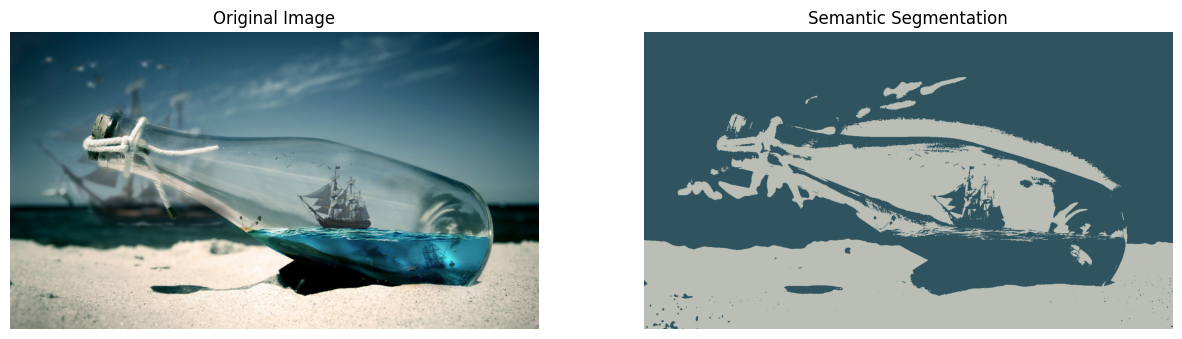

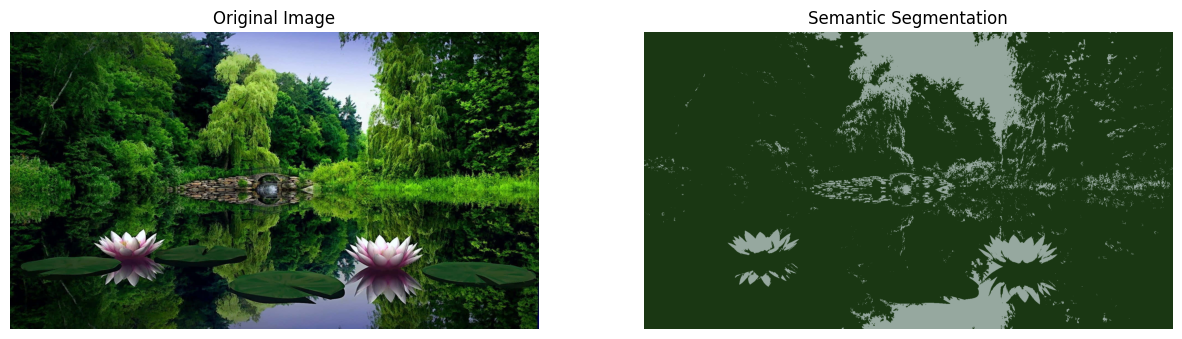

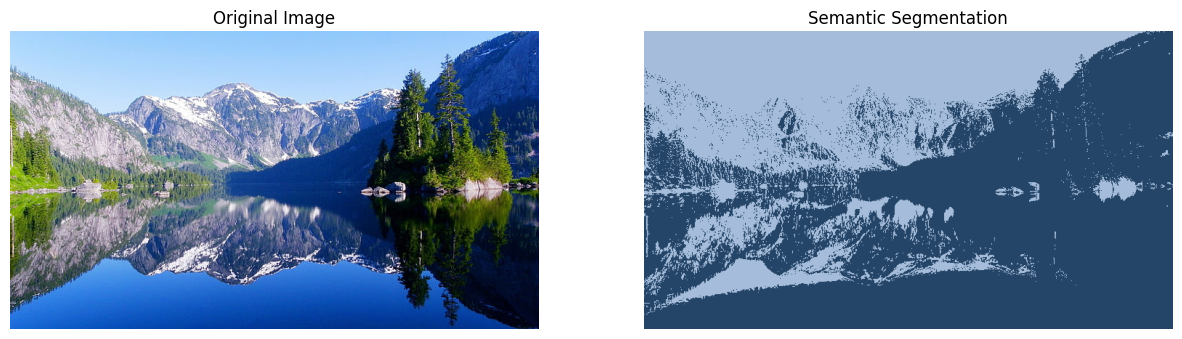

In [3]:
import cv2 as cv
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def load_images(folder_path):
    """Load images from a folder."""
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    images = [cv.imread(image_path) for image_path in image_files]
    return images

def semantic_segmentation(images, num_clusters=2):
    """Perform semantic segmentation using K-means clustering."""
    segmented_images = []
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    for img in images:
        pixels = img.reshape((-1, 3))
        pixels = np.float32(pixels)
        _, labels, centers = cv.kmeans(pixels, num_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        segmented_img = centers[labels.flatten()].reshape(img.shape)
        segmented_images.append(segmented_img)
    return segmented_images

# Load images
folder_path = "/content/drive/MyDrive/Digital Image-Signal Processing/image 4"
images = load_images(folder_path)

# Check if images were loaded correctly
if len(images) == 0:
    print("No images found in the specified folder.")
    exit()

# Perform segmentation
semantic_segmented_images = semantic_segmentation(images)

# Display results
for i in range(min(3, len(images))):  # Ensure we don't go out of range if less than 3 images were loaded
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(semantic_segmented_images[i], cv.COLOR_BGR2RGB))
    plt.title('Semantic Segmentation')
    plt.axis('off')

plt.show()


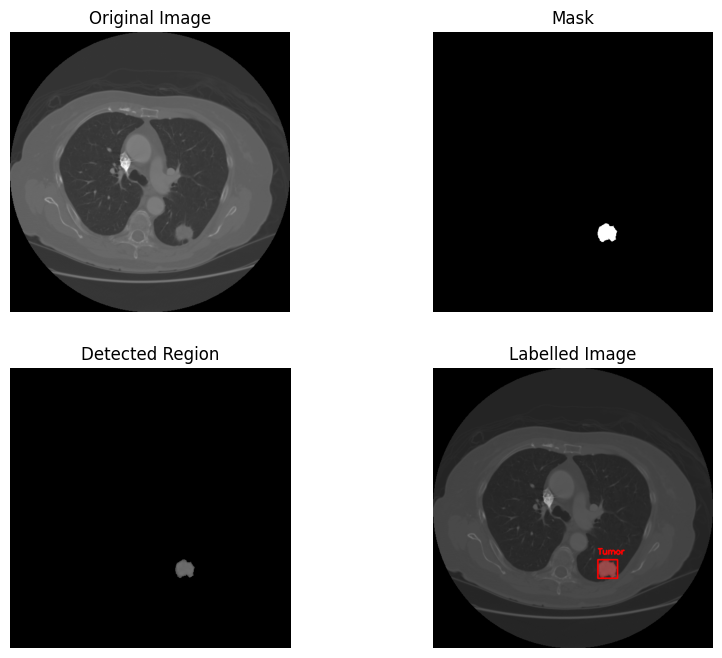

Area of the determined region: 890


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image and mask
image_path = r"/content/drive/MyDrive/Digital Image-Signal Processing/Medical_Image.png"
mask_path = r"/content/drive/MyDrive/Digital Image-Signal Processing/Medical_Mask.png"

image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded properly
if image is None:
    raise FileNotFoundError(f"Unable to load image from path: {image_path}")
if mask is None:
    raise FileNotFoundError(f"Unable to load mask from path: {mask_path}")

# Determine the region using the mask
region = cv2.bitwise_and(image, image, mask=mask)

# Compute the area of the determined region
area = np.sum(mask != 0)

# Create a copy of the mask with red color
red_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
red_mask[mask != 0] = [0, 0, 255]  # Set non-zero mask pixels to red color (BGR format)

# Overlay the red mask onto the original image
labelled_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

# Add a rectangle outside the determined region
x, y, w, h = cv2.boundingRect(mask)  # Get bounding box coordinates
cv2.rectangle(labelled_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle

# Add label "tumor" to the rectangle
cv2.putText(labelled_image, 'Tumor', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the results
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

# Region
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
plt.title("Detected Region")
plt.axis("off")

# Labelled Image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(labelled_image, cv2.COLOR_BGR2RGB))
plt.title("Labelled Image")
plt.axis("off")

plt.show()

# Output area
print("Area of the determined region:", area)
